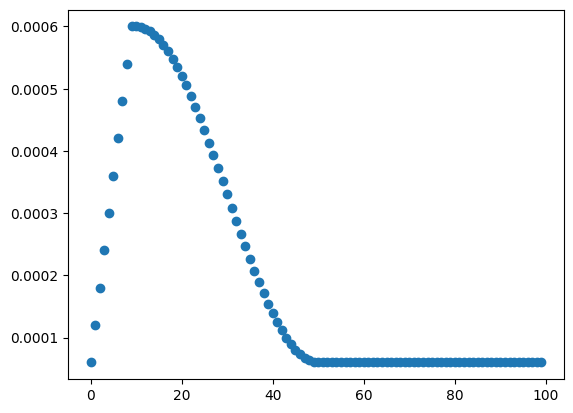

In [1]:
import math 
import matplotlib.pyplot as plt 

max_lr = 6e-4
min_lr = 0.1 * max_lr
warmup = 10
horizon = 50

def get_lr(it):
    if it < warmup:
        return max_lr * (it + 1) / warmup
    if it > horizon:
        return 0.1 * max_lr
    
    decay_ratio = (it - warmup) / (horizon - warmup)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1 + math.cos(math.pi * decay_ratio))
    return min_lr + coeff * (max_lr - min_lr)


lrs = []
for i in range(100):
    lr = get_lr(i)
    lrs.append(lr)


plt.scatter(range(len(lrs)), lrs)

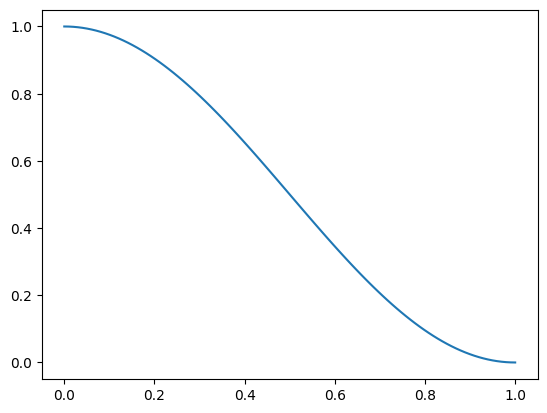

In [17]:
import numpy as np


decay_ratios = np.linspace(0, 1, 100)
plt.plot(decay_ratios,0.5* (1 + np.cos(math.pi*decay_ratios)))

In [19]:
from gpt_network import GPT, GPTConfig

model = GPT(GPTConfig())

In [25]:
param_dict = {pn: p for pn, p in model.named_parameters()}
param_dict = {pn: p for pn, p in param_dict.items() if p.requires_grad}
len(param_dict)

148